# The setup

In [77]:
my_key = ""

In [78]:
import os

# Normally, you'd want to put this in your .bashrc or however Windows does it
os.environ["MY_API_KEY"] = my_key
os.environ["MY_API_URL"] = "https://westcentralus.api.cognitive.microsoft.com/face/v1.0"

# Then, you'd just have this. Secure!
API_KEY = os.environ["MY_API_KEY"]
API_URL = os.environ["MY_API_URL"]

# Some images to play with

In [204]:
# A single face
# pic_url = "http://facefacts.scot/images/science/Q2_high_health_f.jpg"

# Enterprise crew
# pic_url = "http://www.startrek.com/uploads/assets/db_articles/90645ffc8f3350fd1bf303550781525b6d5a9982.jpg"


### Sunglasses
# Kids with sunglasses
# pic_url = "https://albertonrecord.co.za/wp-content/uploads/sites/35/2015/01/Children-Image.jpg"
# Women w/sunglasses
# pic_url = "http://forevertwentysomethings.com/wp-content/uploads/2011/06/dita-claudia-vic.jpg"
# Ice Cube with sunglasses
# pic_url = "http://media.breitbart.com/media/2016/04/ice-cube-barber-shop-premiere-ap-640x480.jpg"
# Kanye w/sunglasses
# pic_url = "http://splashysplash.com/wp-content/uploads/2011/03/kanye-west-balmain-red-leather-Jacket-oliver-peoples-daddy-b-sunglases.jpg"


### Hat/hood and glasses
# Woman with hood, hat, and glasses
# pic_url = "https://www.coastal.com/thelook/wp-uploads/2013/02/0R4A90831.jpg"
# Woman with hood and glasses
# pic_url = "https://thumb1.shutterstock.com/display_pic_with_logo/818215/635026088/stock-photo-beautiful-woman-in-fashion-glasses-and-colorful-sports-jacket-with-green-hood-smiling-with-eyes-635026088.jpg"
# Woman with hood and sunglasses
# pic_url = "https://thumb7.shutterstock.com/display_pic_with_logo/3179588/340204724/stock-photo-surprised-pretty-girl-wearing-in-sunglasses-white-sweater-and-gloves-posing-with-scarf-on-her-340204724.jpg"


### Some images attempting to defeat facial recognition
# pic_url = "https://images.techhive.com/images/article/2015/03/defeating-face-detection-with-hairstyles-100571245-large.idge.jpg"
# pic_url = "https://i.ytimg.com/vi/kGGnnp43uNM/maxresdefault.jpg"
# pic_url = "https://i0.wp.com/www.ewdn.com/wp-content/uploads/sites/6/2017/07/8697e47ac95d8f3b75063.jpg"

# Making a request

In [205]:
import requests

# Let's make a request
request = requests.request(
    "POST",
    "{}/detect".format(os.environ["MY_API_URL"]), 
    
    headers = {
        "Content-Type": "application/json",
        "Ocp-Apim-Subscription-Key": os.environ["MY_API_KEY"],
    },
    
    params = {
        'returnFaceId': 'true',
        'returnFaceLandmarks': 'false',
        'returnFaceAttributes': 'age,gender,headPose,smile,facialHair,glasses,emotion,hair,makeup,occlusion,accessories,blur,exposure,noise',
    },
    json = {"url": pic_url})

response = request.json()

In [206]:
# https://en.wikipedia.org/wiki/List_of_HTTP_status_codes
request.status_code

200

In [215]:
response[0]

{'faceAttributes': {'accessories': [{'confidence': 0.78, 'type': 'glasses'},
   {'confidence': 0.99, 'type': 'headwear'}],
  'age': 30.9,
  'blur': {'blurLevel': 'low', 'value': 0.2},
  'emotion': {'anger': 0.0,
   'contempt': 0.0,
   'disgust': 0.0,
   'fear': 0.0,
   'happiness': 1.0,
   'neutral': 0.0,
   'sadness': 0.0,
   'surprise': 0.0},
  'exposure': {'exposureLevel': 'goodExposure', 'value': 0.5},
  'facialHair': {'beard': 0.0, 'moustache': 0.0, 'sideburns': 0.0},
  'gender': 'female',
  'glasses': 'ReadingGlasses',
  'hair': {'bald': 0.0, 'hairColor': [], 'invisible': True},
  'headPose': {'pitch': 0.0, 'roll': -1.2, 'yaw': -2.4},
  'makeup': {'eyeMakeup': True, 'lipMakeup': True},
  'noise': {'noiseLevel': 'low', 'value': 0.27},
  'occlusion': {'eyeOccluded': False,
   'foreheadOccluded': True,
   'mouthOccluded': False},
  'smile': 1.0},
 'faceId': 'e48815d7-26da-450d-9aa4-f4da5fbb01d8',
 'faceRectangle': {'height': 116, 'left': 101, 'top': 85, 'width': 116}}

# Let's take a look!

In [208]:
from PIL import Image
from io import BytesIO

# Gets our image by its url
img_response = requests.get(pic_url)
img = Image.open(BytesIO(img_response.content))

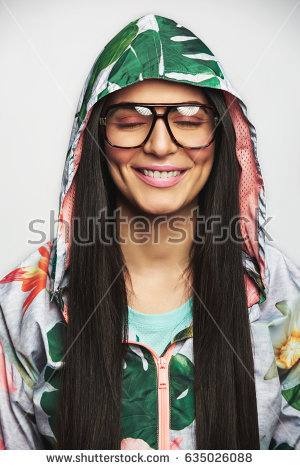

In [209]:
img

# Let's put our request to use

In [260]:
import copy
from PIL import ImageDraw, ImageFont

# Draws rectangles around any detected faces and returns a new image
def draw_rects(img, response, width=2, fill="white"):
    nimg = copy.copy(img)
    draw = ImageDraw.Draw(nimg)
    
    font = font = ImageFont.truetype("GothamMedium.ttf", 50)
    
    
    for idx, r in enumerate(response):
        r = r["faceRectangle"]
        left, top = r["left"], r["top"]
        right, bottom = left + r["width"], top + r["height"]
#         PIL doesn't support rectangle width, so we'll draw 4 lines
#         draw.rectangle([left, top, right, bottom], outline="black", width=2)
        draw.line([left, top, right, top], width=width, fill=fill)
        draw.line([right, top, right, bottom], width=width, fill=fill)
        draw.line([right, bottom, left, bottom], width=width, fill=fill)
        draw.line([left, bottom, left, top], width=width, fill=fill)
        draw.text((top, left), str(idx+1), fill=fill, font=font)
       
    return nimg

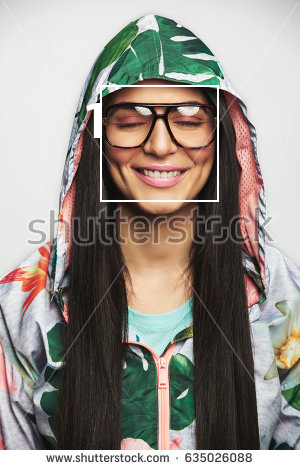

In [261]:
draw_rects(img, response)

# What else does our response give us?

In [234]:
### Emotions
prim_emotions = []
for r in response:
    emotions = r["faceAttributes"]["emotion"]
    prim_emotions.append(max(emotions, key=lambda key: emotions[key]))
print("Primary emotions:")
print("\n".join(prim_emotions))

Primary emotions:
happiness


In [263]:
### Accessories
accessories = []
for r in response:
    accessories.append(r["faceAttributes"]["accessories"])
print(accessories)

[[{'type': 'glasses', 'confidence': 0.78}, {'type': 'headwear', 'confidence': 0.99}]]


In [264]:
### Occlusion
occ = []
for r in response:
    occ.append(r["faceAttributes"]["occlusion"])
print(occ)

[{'foreheadOccluded': True, 'eyeOccluded': False, 'mouthOccluded': False}]
